In [1]:
import os

In [2]:
print(os.getcwd())

C:\Users\Aditya\Anaconda3\envs\tgpu\my_projects\asl


In [4]:
a_dir = os.path.join('asl_alphabet_train', 'A')
b_dir = os.path.join('asl_alphabet_train', 'B')
c_dir = os.path.join('asl_alphabet_train', 'C')
d_dir = os.path.join('asl_alphabet_train', 'D')
e_dir = os.path.join('asl_alphabet_train', 'E')
f_dir = os.path.join('asl_alphabet_train', 'F')
g_dir = os.path.join('asl_alphabet_train', 'G')
h_dir = os.path.join('asl_alphabet_train', 'H')
i_dir = os.path.join('asl_alphabet_train', 'I')
j_dir = os.path.join('asl_alphabet_train', 'J')
k_dir = os.path.join('asl_alphabet_train', 'K')
l_dir = os.path.join('asl_alphabet_train', 'L')
m_dir = os.path.join('asl_alphabet_train', 'M')
n_dir = os.path.join('asl_alphabet_train', 'N')
o_dir = os.path.join('asl_alphabet_train', 'O')
p_dir = os.path.join('asl_alphabet_train', 'P')
q_dir = os.path.join('asl_alphabet_train', 'Q')
r_dir = os.path.join('asl_alphabet_train', 'R')
s_dir = os.path.join('asl_alphabet_train', 'S')
t_dir = os.path.join('asl_alphabet_train', 'T')
u_dir = os.path.join('asl_alphabet_train', 'U')
v_dir = os.path.join('asl_alphabet_train', 'V')
w_dir = os.path.join('asl_alphabet_train', 'W')
x_dir = os.path.join('asl_alphabet_train', 'X')
y_dir = os.path.join('asl_alphabet_train', 'Y')
z_dir = os.path.join('asl_alphabet_train', 'Z')

In [5]:
print('total training images for A:', len(os.listdir(a_dir))) # each directory contains 3000 training images.

total training images for A: 3000


In [6]:
print('total training images for Z:', len(os.listdir(z_dir))) # each directory contains 3000 training images.

total training images for Z: 3000


In [7]:
some_files = os.listdir(a_dir)
print(some_files[:10]) # printing some of the files to check them.

['A1.jpg', 'A10.jpg', 'A100.jpg', 'A1000.jpg', 'A1001.jpg', 'A1002.jpg', 'A1003.jpg', 'A1004.jpg', 'A1005.jpg', 'A1006.jpg']


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
pic_index = 2

next_pic = [os.path.join(a_dir, fname) for fname in some_files[pic_index-2:pic_index]]

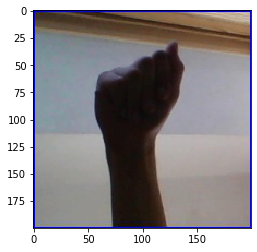

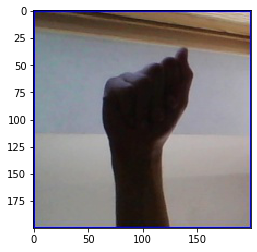

In [10]:
for img_path in next_pic:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    #plt.axis('Off')
    plt.show()

In [11]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [12]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
            if(logs.get('acc') > 0.98):
                print('\nReached 98.0% accuracy so cancelling training!')
                self.model.stop_training = True

callbacks = myCallback()

In [13]:
TRAINING_DIR = os.path.join('asl_alphabet_train')

training_datagen = ImageDataGenerator(
rescale = 1./255.)#,
#rotarion_range = 40,
#width_shift_range = 0.2,
#height_shift_range = 0.2,
#shear_range = 0.2,
#horizontal_flip = True,
#fill_mode = 'nearest')

train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size = (64, 64),
class_mode = 'categorical')

Found 87000 images belonging to 29 classes.


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(29, activation='softmax')
])

model.summary()

W0914 00:01:24.895379  1344 deprecation.py:506] From C:\Users\Aditya\Anaconda3\envs\tgpu\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 61504)             0         
_________________________________________________________________
dropout (Dropout)            (None, 61504)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               31490560  
_________________________________________________________________
dense_1 (Dense)              (None, 29)                14877     
Total params: 31,507,229
Trainable params: 31,507,229
Non-trainable params: 0
____________________________________________

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [16]:
history = model.fit_generator(train_generator,
                              epochs = 5,
                              #validation_data = val_generator,
                              #steps_per_epoch = 8,
                              verbose = 1,
                             callbacks=[callbacks])

Epoch 1/5
2719/2719 [==============================] - 336s 124ms/step - loss: 0.7941 - acc: 0.7577
Epoch 2/5
2719/2719 [==============================] - 337s 124ms/step - loss: 0.1527 - acc: 0.9475
Epoch 3/5
2719/2719 [==============================] - 338s 124ms/step - loss: 0.0882 - acc: 0.9704
Epoch 4/5
2719/2719 [==============================] - 371s 137ms/step - loss: 0.0667 - acc: 0.9782
Epoch 5/5
2718/2719 [============================>.] - ETA: 0s - loss: 0.0543 - acc: 0.9831
Reached 98.0% accuracy so cancelling training!
2719/2719 [==============================] - 365s 134ms/step - loss: 0.0544 - acc: 0.9831


In [17]:
import numpy as np # testing images.
path = os.path.join('asl_alphabet_test', 'A_test.jpg')
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)

In [18]:
print(classes) # which is correct

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [19]:
path = os.path.join('asl_alphabet_test', 'B_test.jpg')
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]]


In [20]:
path = os.path.join('asl_alphabet_test', 'Z_test.jpg')
img = image.load_img(path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0.]]
